In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('./data/2019.csv', index_col=[0,1])
data

,,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,Country or region,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


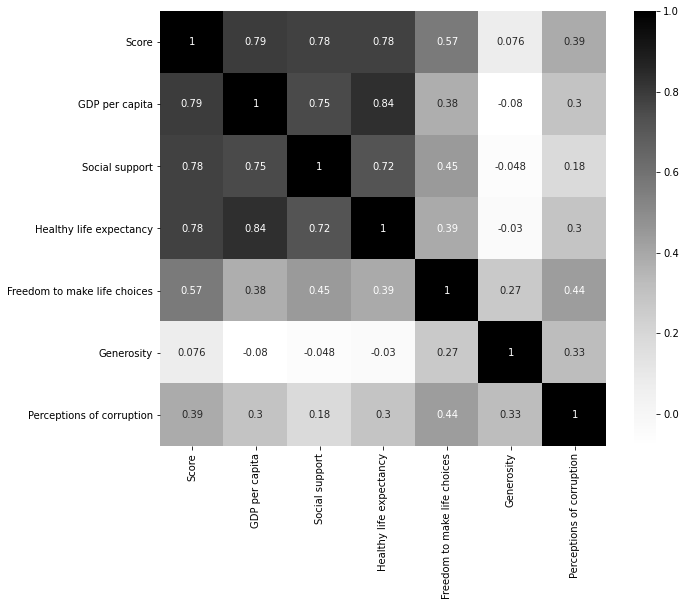

In [2]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='Greys')

## Correlations
#### Score and...
* GDP per capita: ***79%***
* Social support: ***78%***
* Healthy life expectancy: ***78%***
* Freedom to make life choices: ***57%***

#### GDP per capita and...
* Healthy life expectancy: ***84%***
* Social support: ***75%***

#### Social Support and...
* Healthy life expectancy: ***72%***

## Plotting column relevance for top, middle, bottom ranked countries

In [3]:
data_rev = data.reset_index(level=0)
data_rev

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


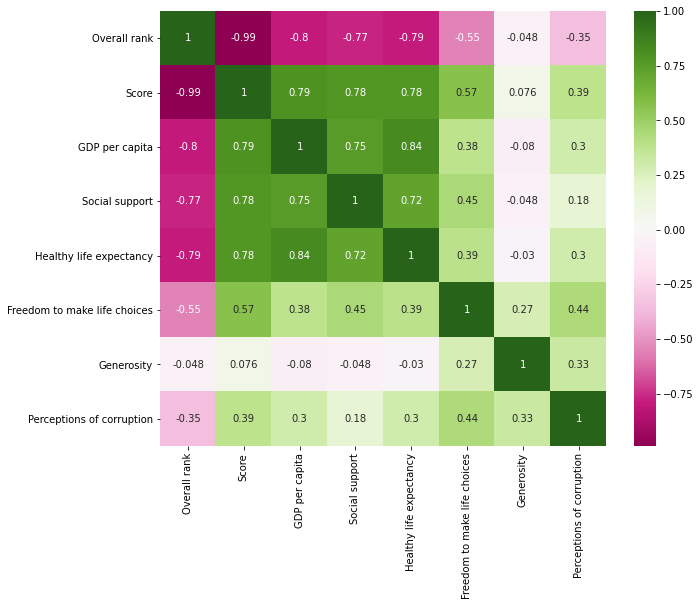

In [4]:
corr2 = data_rev.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='PiYG')

In [5]:
data_rev.sort_values(by=['Overall rank'], inplace=True)
data_rev

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [6]:
data_rev.Score.describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

In [7]:
data.loc[data.Score>=6.184500,'Weighed'] = 'Top 25%'
data.loc[(data.Score>4.544500) & (data.Score<6.184500),'Weighed'] = 'Middle 50%'
data.loc[data.Score<=4.544500,'Weighed'] = 'Bottom 25%'
data

,,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Weighed
Overall rank,Country or region,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Top 25%
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Top 25%
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Top 25%
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Top 25%
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Top 25%
...,...,...,...,...,...,...,...,...,...
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Bottom 25%
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Bottom 25%
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Bottom 25%


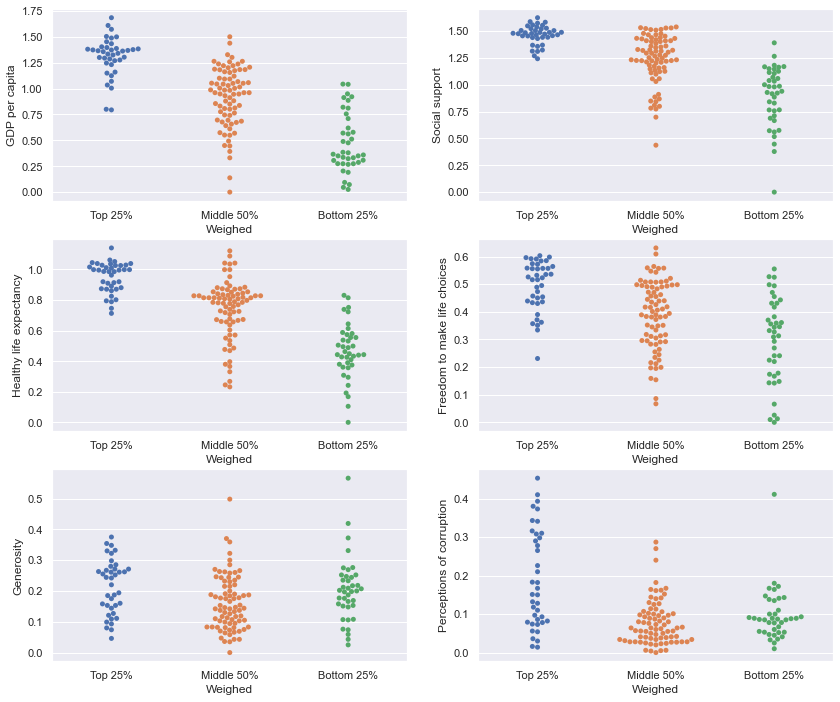

In [8]:
from pylab import *

sns.set(rc={'figure.figsize': (14,12)})

subplot(3,2,1)
f1 = sns.swarmplot(data=data, x='Weighed', y='GDP per capita')

subplot(3,2,2)
f2 = sns.swarmplot(data=data, x='Weighed', y='Social support')

subplot(3,2,3)
f3 = sns.swarmplot(data=data, x='Weighed', y='Healthy life expectancy')

subplot(3,2,4)
f4 = sns.swarmplot(data=data, x='Weighed', y='Freedom to make life choices')

subplot(3,2,5)
f5 = sns.swarmplot(data=data, x='Weighed', y='Generosity')

subplot(3,2,6)
f6 = sns.swarmplot(data=data, x='Weighed', y='Perceptions of corruption')

plt.show()

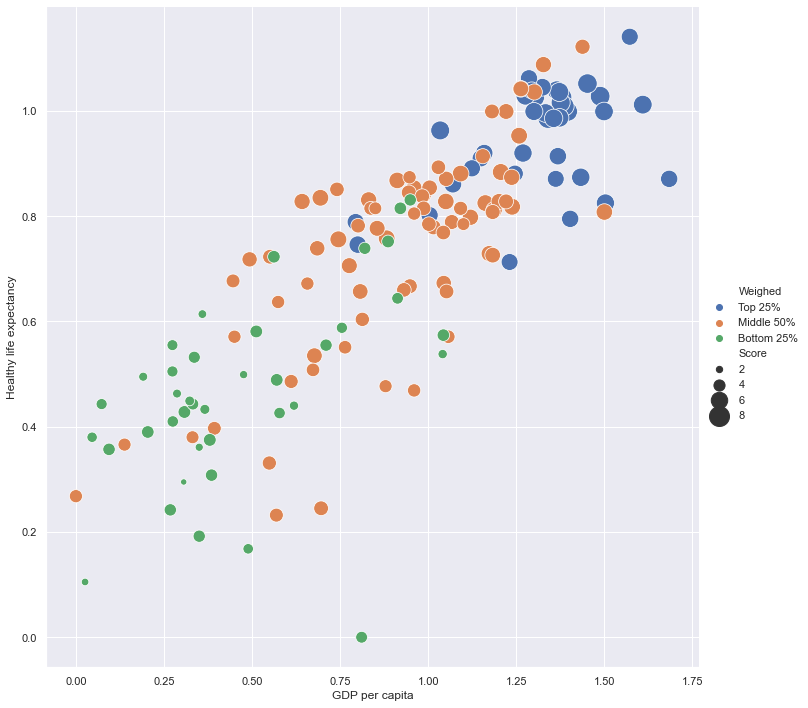

In [9]:
sns.relplot(x="GDP per capita", y="Healthy life expectancy", size="Score",  sizes=(40, 400), hue='Weighed', height=10, data=data)

### Findings
1. 'Overall rank' of a country's happiness is highly relevant (& dependent) on GDP per capita, amount of social support, and healthy life expectancy
2. Surprisingly the relation between a country's happiness and their generosity is weak.
3. 'Happier' countries value freedom to make life choices, while this is not so prevalant in average~least happy countries
4. GDP per capita and Healthy life expectancy go hand in hand, with the obvious fact of the 'happier' countries having much higher GDP & longer life expectancy
5. (and extension from #4) There are some outliers within the bottom 25% group, where some of them appear to have higher values in both columns than some countries from the top 25%.

**Why are the outliers in the bottom 25% group classified as such when they score high in GDP and life expectancy?**

In [10]:
# Addressing the outliers as the top 10 countries from the bottom 25% group 
# with the highest values in the 'GDP per capita' and 'Healthy life expectancy' columns
outliers = data[data.Weighed=='Bottom 25%'].sort_values(by=['GDP per capita', 'Healthy life expectancy'], ascending=False)[:10]
outliers

,,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Weighed
Overall rank,Country or region,,,,,,,,
126,Iraq,4.437,1.043,0.980,0.574,0.241,0.148,0.089,Bottom 25%
148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,Bottom 25%
130,Sri Lanka,4.366,0.949,1.265,0.831,0.470,0.244,0.047,Bottom 25%
124,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055,Bottom 25%
137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,0.067,Bottom 25%
119,Georgia,4.519,0.886,0.666,0.752,0.346,0.043,0.164,Bottom 25%
133,Ukraine,4.332,0.820,1.390,0.739,0.178,0.187,0.010,Bottom 25%
135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,Bottom 25%
140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,Bottom 25%


In [11]:
# Plotting their 'Freedom to make life choice' and 'Perceptions of corruption' aginst those of the happier countries
above_avg = data[data.Score>=data.Score.mean()]